In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [21]:
X = pd.read_csv('reduced_df.csv') 

  
# Dropping the CUST_ID column from the data 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 
  
print(X.head()) 

   Unnamed: 0  BALANCE_FREQUENCY  ONEOFF_PURCHASES  ...  installment  none  one_off
0           0           0.597837          0.000000  ...            1     0        0
1           1           0.646627          0.000000  ...            0     1        0
2           2           0.693147          6.651791  ...            0     0        1
3           3           0.492477          7.313220  ...            0     0        1
4           4           0.693147          2.833213  ...            0     0        1

[5 rows x 18 columns]


In [0]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized)

In [23]:
pca = PCA(n_components = 5) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3','P4','P5'] 
print(X_principal.head()) 

         P1        P2        P3        P4        P5
0  0.056811  0.615722  0.279367 -0.009008  0.259617
1  0.873206 -0.034449 -0.184796  0.268683  0.135682
2 -0.192561 -0.508472  0.506714 -0.379634  0.131159
3  0.314447 -0.366759  0.527698 -0.265992  0.032511
4  0.418327 -0.159671  0.557747 -0.297372  0.373932


In [0]:
gmm = GaussianMixture(n_components = 2)

In [0]:
gmm.fit(X_principal) 
labels = gmm.predict(X_principal) 

In [0]:
df_stage_1=pd.DataFrame(X_principal)
df_stage_1['Cluster']=labels

In [27]:
df_stage_1.head

<bound method NDFrame.head of             P1        P2        P3        P4        P5  Cluster
0     0.056811  0.615722  0.279367 -0.009008  0.259617        1
1     0.873206 -0.034449 -0.184796  0.268683  0.135682        0
2    -0.192561 -0.508472  0.506714 -0.379634  0.131159        0
3     0.314447 -0.366759  0.527698 -0.265992  0.032511        0
4     0.418327 -0.159671  0.557747 -0.297372  0.373932        0
...        ...       ...       ...       ...       ...      ...
8945 -0.448445  0.725984  0.020431 -0.050491 -0.242283        1
8946 -0.408534  0.741187 -0.018148 -0.214093 -0.110101        1
8947 -0.316981  0.806950  0.078341 -0.151442 -0.128083        1
8948  0.758393  0.268883  0.122112  0.310031  0.061995        0
8949  0.034079 -0.508083  0.294610 -0.355161 -0.505743        0

[8950 rows x 6 columns]>

In [28]:
df_stage2_1=df_stage_1[df_stage_1['Cluster']==0]
print(df_stage2_1)
df_stage2_2=df_stage_1[df_stage_1['Cluster']==1]
print(df_stage2_2)

            P1        P2        P3        P4        P5  Cluster
1     0.873206 -0.034449 -0.184796  0.268683  0.135682        0
2    -0.192561 -0.508472  0.506714 -0.379634  0.131159        0
3     0.314447 -0.366759  0.527698 -0.265992  0.032511        0
4     0.418327 -0.159671  0.557747 -0.297372  0.373932        0
9     0.013413 -0.277149  0.818698  0.102646 -0.103155        0
...        ...       ...       ...       ...       ...      ...
8939  0.321459 -0.481926  0.256793 -0.545522 -0.257044        0
8943  0.293414  0.073555  0.798387 -0.022352 -0.148204        0
8944  0.027337 -0.213555  0.697418 -0.320000 -0.087913        0
8948  0.758393  0.268883  0.122112  0.310031  0.061995        0
8949  0.034079 -0.508083  0.294610 -0.355161 -0.505743        0

[3916 rows x 6 columns]
            P1        P2        P3        P4        P5  Cluster
0     0.056811  0.615722  0.279367 -0.009008  0.259617        1
5    -0.286107  0.456144 -0.209152 -0.475004  0.372576        1
6    -0.776047 

In [29]:
df_stage2_1.drop(["Cluster"], axis = 1, inplace = True)
df_stage2_1.head
df_stage2_2.drop(["Cluster"], axis = 1, inplace = True)
df_stage2_2.head

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<bound method NDFrame.head of             P1        P2        P3        P4        P5
0     0.056811  0.615722  0.279367 -0.009008  0.259617
5    -0.286107  0.456144 -0.209152 -0.475004  0.372576
6    -0.776047 -0.383390  0.026666  0.268666  0.001267
7    -0.382824  0.509098 -0.229000 -0.404606  0.298655
8    -0.453506 -0.253221  0.133322  0.241872  0.543527
...        ...       ...       ...       ...       ...
8941  0.207716  0.229941 -0.670421 -0.263530 -0.584108
8942 -0.354307  0.764363 -0.001367 -0.205657 -0.096330
8945 -0.448445  0.725984  0.020431 -0.050491 -0.242283
8946 -0.408534  0.741187 -0.018148 -0.214093 -0.110101
8947 -0.316981  0.806950  0.078341 -0.151442 -0.128083

[5034 rows x 5 columns]>

In [30]:
gmm.fit(df_stage2_1) 
labels_stage2_1=gmm.predict(df_stage2_1) 
gmm.fit(df_stage2_2) 
labels_stage2_2=gmm.predict(df_stage2_2) 
labels_stage2_2


array([0, 0, 1, ..., 0, 0, 0])

In [31]:
labels_stage2_2[labels_stage2_2 == 0] = 2
labels_stage2_2[labels_stage2_2 == 1] = 3
labels_stage2_2

array([2, 2, 3, ..., 2, 2, 2])

In [32]:
df_stage2_1['Cluster']=labels_stage2_1
df_stage2_2['Cluster']=labels_stage2_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df_final=df_stage2_1.append(df_stage2_2, ignore_index = True) 


In [34]:
print(set(df_final['Cluster']))

{0, 1, 2, 3}


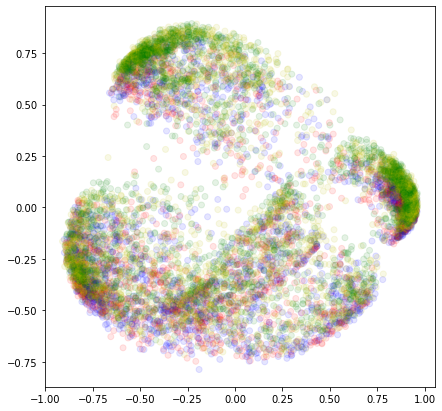

In [35]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'purple'}
label_color=[color_map[l] for l in df_final['Cluster']]
plt.figure(figsize=(7,7))
plt.scatter(x='P1',y='P2',c=label_color,cmap='Spectral',alpha=0.1,data=X_principal)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


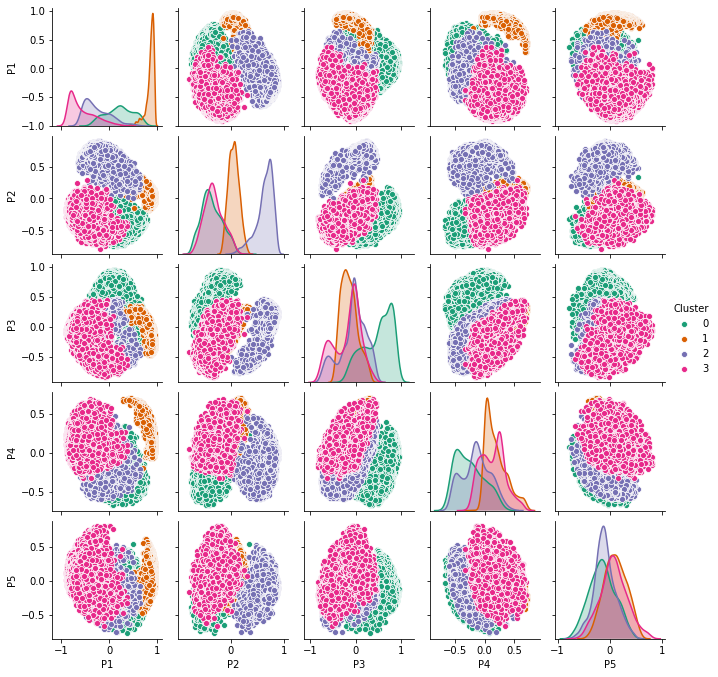

In [36]:
import seaborn as sns
sns.pairplot(df_final,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [37]:
from sklearn import metrics
from sklearn.metrics import calinski_harabaz_score,silhouette_score
labels=np.array(df_final['Cluster'])
best_sil_score=silhouette_score(X_principal,labels)
best_cal_score=calinski_harabaz_score(X_principal,labels)
print('Silhouette Score is {}'.format(best_sil_score))
print('Calinski_harabaz Score is {}'.format(best_cal_score))

Silhouette Score is -0.020666067061257058
Calinski_harabaz Score is 46.05663425222903


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


In [38]:
labels

array([1, 0, 0, ..., 2, 2, 2])

In [0]:
credit=pd.read_csv('credit.csv')
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]] 
cr_pre.describe()
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(labels,name='Cluster')],axis=1)

In [40]:
cluster_4=cluster_df_4.groupby('Cluster')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster,0,1,2,3
PURCHASES_TRX,18.491200,16.281725,12.085841,13.135184
Monthly_avg_purchase,113.277910,103.334987,62.944224,74.156836
Monthly_cash_advance,106.128582,101.377978,77.444424,77.658620
limit_usage,0.417920,0.408575,0.358585,0.379453
CASH_ADVANCE_TRX,3.390933,3.466438,3.146018,3.076424
payment_minpay,10.377175,6.567201,8.675421,10.314422
both_oneoff_installment,0.378133,0.358648,0.250885,0.276136
installment,0.184533,0.191083,0.319912,0.288753
one_off,0.225067,0.230769,0.194690,0.195025
none,0.212267,0.219500,0.234513,0.240087


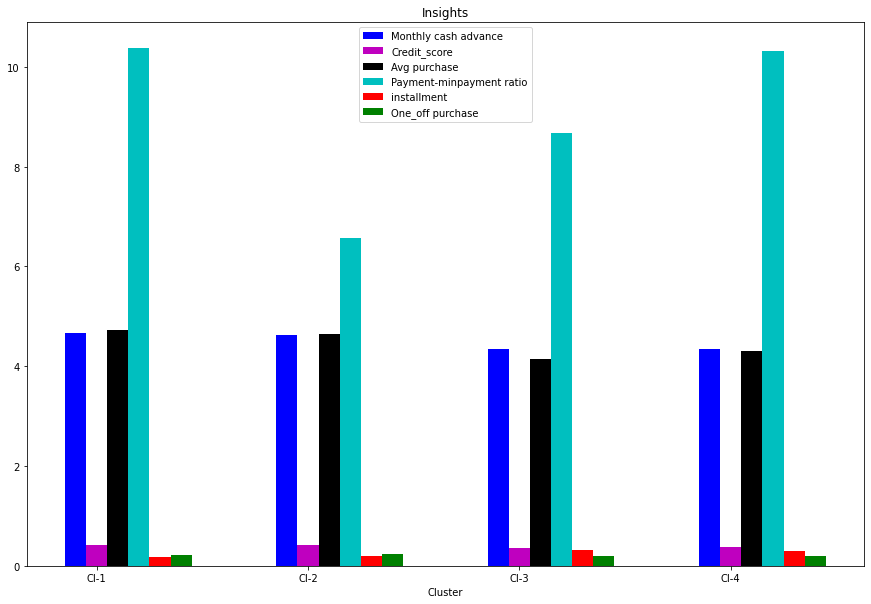

In [41]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-1', 'Cl-2', 'Cl-3', 'Cl-4'))
plt.legend()